## 🎬  **Project Title** : 

**Box Office Gold**: **Data-Driven Insights for a Profitable Movie Studio Launch**

### **Business Understanding**

#### 👥 Stakeholder
The primary stakeholder is the executive team of the company's new movie studio. They need insights into the film industry to make confident decisions on what type of movies to produce.

🌍 **Domain**:

**Entertainment & Media Analytics (specifically, Film Industry/Box Office Performance)**

📘 **Introduction**:

With the growing trend of major companies venturing into original film production, my organization is planning to launch its own movie studio. However, without prior experience in the film industry, there’s uncertainty about what types of movies resonate with audiences and drive box office success. This project aims to analyze trends in box office data to uncover what genres, budgets, and other film attributes contribute most to commercial success — providing strategic guidance for profitable content creation.

#### 🎯 **Business Objectives** :

1. **To Identify High-Performing Film Genres**:

* Analyze box office data to determine which movie genres consistently generate the highest revenue and audience engagement.

2. **To Examine the Relationship Between Budget and Profitability**:

* Investigate how production budgets influence box office success and identify the budget range that maximizes return on investment (ROI).

3. **To Assess the Impact of Key Film Attributes**:

* Explore how factors such as runtime, cast, release date (season), and film ratings (e.g., PG-13, R) affect a movie’s performance.

4. **To Benchmark Against Top Studios** :

* Analyze which production studios are leading in terms of commercial success and identify patterns in their film portfolios.

5. **To Provide Actionable Recommendations**:

Based on the insights, suggest the optimal type of film (genre, budget, release timing, etc.) that the company should produce for a successful studio launch.

#### 📊 **Project Plan**: **Box Office Gold – Data-Driven Insights for a Profitable Movie Studio Launch**

🔍 **1. Problem Understanding & Goal Definition**

* Review business problem: Identify film types that succeed at the box office.

* Define clear goals: Provide recommendations on genre, budget, and release strategy.


📦 **2. Data Collection**

**Source Box Office Datasets from platforms like**:

* Im.db.zip(movie_basics & Movie_ratings)

* bom.movie_gross.gz

**Collect relevant data fields**:

Genre, budget, revenue, runtime, release date, production company, director, cast, rating, etc.


🧹 **3. Data Cleaning & Preprocessing**

* Handle missing values and inconsistencies.
* Standardize formats (dates, currencies, genres).
* Convert categorical variables where necessary.
* Remove duplicates or irrelevant records (e.g., short films, non-theatrical releases).

📊 **4. Exploratory Data Analysis (EDA)**

* Univariate & Bivariate Analysis (e.g., budget vs revenue, genre vs revenue).
* Correlation heatmaps, box plots, histograms.
* Identify outliers and common patterns in successful films.
* Segment data by genre, production studio, or release year.

🧠 **5. Insights & Recommendations**

* Summarize which genres are top performers.
* Recommend ideal budget ranges.
* Identify optimal release months/seasons.
* Suggest attributes linked to successful movies (e.g., popular runtimes, ratings).

📑 **6. Reporting & Visualization**

* Build clear and compelling visualizations (using Tableau, Power BI, or Python’s Seaborn/Matplotlib).
* Draft a business-focused report or slide deck.

**Include:**

* Key findings
* Strategic suggestions
* Visual evidence

📢 **7. Presentation to Stakeholders**

* Communicate insights in non-technical language.
* Show data-driven rationale for proposed movie types.
* Allow room for stakeholder feedback and Q&A.









### **Overview/Background**

As the entertainment industry shifts toward original content production, many large companies are investing in their own movie studios to capture audience attention and drive revenue. The company seeks to follow this trend but lacks experience in film production. To ensure a successful studio launch, this project aims to analyze historical box office data to uncover key trends in genre performance, budget impact, and other critical success factors. The goal is to provide data-driven insights that will guide strategic decisions on what types of films to produce for maximum box office success.


### **Challenges**

One of the main challenges in this project is acquiring comprehensive and reliable box office data that includes essential attributes such as genre, budget, revenue, and release details. Additionally, the film industry is influenced by unpredictable factors like audience trends, star power, and marketing, which are difficult to quantify. Ensuring data quality, handling missing or inconsistent entries, and drawing actionable insights that align with business goals also present key hurdles in the analysis process.


### **Proposed Solution**

To address the business challenge, this project proposes a data-driven approach that involves collecting and analyzing historical box office data to identify patterns in successful films. By examining factors such as genre, budget, revenue, release timing, and other key attributes, the project will uncover trends that correlate with box office success. The insights will then be translated into practical recommendations to guide the company in producing films with higher chances of commercial success.

### **Conclusion**:

Launching a successful movie studio requires more than creativity—it demands strategic, data-informed decisions. This project leverages box office analytics to uncover what drives film profitability, helping the company make confident choices about genre, budget, and release strategy. With clear insights and recommendations, the company will be well-positioned to enter the competitive film industry with a strong foundation for success.

### ❗ **Problem Statement**

As the company plans to venture into original film production, it faces significant uncertainty due to a lack of industry experience. 🎬 Making informed decisions about what types of films to produce is challenging without a clear understanding of market trends and performance drivers. Additionally, obtaining accurate and complete box office data is difficult, and the film industry itself is influenced by various unpredictable factors such as changing audience preferences, marketing impact, and star power. These challenges make it hard to identify what contributes to a movie’s commercial success and pose a risk to the company’s new venture.


🎯 **Objectives**

- **To analyze historical movie data to identify patterns and trends** related to box office performance.

- **To identify the highest-grossing films and the characteristics that contributed to their success**.

- To determine key factors **such as genre, budget, cast, and runtime** that significantly influence box office revenue.

- To Present insights visually through an interactive dashboard and a clear, non-technical presentation tailored for business stakeholders.

- **To Provide actionable recommendations** to guide the company's new movie studio in selecting and producing high-potential films.

## 📊 **Data Understanding**

The data for this project comes from multiple sources:

1. **im.db.zip**:

**A zipped SQLite database that contains various tables. The two most relevant tables are**:

* **movie_basics**: Likely includes key information about movies such as titles, genres, release dates, runtime, etc.
* **movie_ratings**: Contains viewer and critic ratings, providing insight into movie reception.

2. **bom.movie_gross.csv.gz**:

* A compressed CSV file containing box office gross data. This file is essential for analyzing revenue trends and overall financial performance.
* These sources combined offer a comprehensive view of film attributes and performance metrics, which are crucial for understanding the factors behind movie success.



In cell below I **import Libraries** to use to achieve the project goals

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In cell below I load and organize data for analysis from `im.db.zip` and `bom.movie_gross.csv.gz` using variable **film_df**. The data is contained in different sources. For the `im.db (after extracting)` I will all tables which I am focusing with in this project `movie_basics` `directors`, `known_for`, `movie_akas`,`movie_ratings`, `persons`, `principals` and
 `writers`. And for the `bom.movie_gross.csv.gz (compressed file)`

In [6]:
# create connection to im.db

conn = sqlite3.connect('zippedData/im.db/im.db')

# initialize cursor object 
cur = conn.cursor()

#output all tables on im.db
cur.execute("SELECT name from sqlite_master").fetchall()

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [8]:


query ="""SELECT *
                from principals
                JOIN movie_akas USING (movie_id)
                JOIN movie_basics USING (movie_id)
                JOIN movie_ratings USING (movie_id)
                JOIN persons USING (person_id);
"""

# output query using pandas

film_df = pd.read_sql(query, conn)
film_df.head()

,movie_id,ordering,person_id,category,job,characters,ordering,title,region,language,...,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,tt0323808,10,nm0059247,editor,None,None,1,May Day,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
1,tt0323808,10,nm0059247,editor,None,None,2,Cowboys for Christ,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
2,tt0323808,10,nm0059247,editor,None,None,3,The Wicker Tree,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
3,tt0323808,10,nm0059247,editor,None,None,4,The Wicker Tree,None,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
4,tt0323808,10,nm0059247,editor,None,None,5,Плетеное дерево,RU,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"


In cell I check the shape of `film_df`

In [9]:
# check for shape

film_df.shape

(2422866, 24)

The cell above shows that `film_df` contains **2422866** entries(rows) and **24** attributes.



In [ ]:
# meta data summary

film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422866 entries, 0 to 2422865
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   movie_id            object 
 1   ordering            int64  
 2   person_id           object 
 3   category            object 
 4   job                 object 
 5   characters          object 
 6   ordering            int64  
 7   title               object 
 8   region              object 
 9   language            object 
 10  types               object 
 11  attributes          object 
 12  is_original_title   float64
 13  primary_title       object 
 14  original_title      object 
 15  start_year          int64  
 16  runtime_minutes     float64
 17  genres              object 
 18  averagerating       float64
 19  numvotes            int64  
 20  primary_name        object 
 21  birth_year          float64
 22  death_year          float64
 23  primary_profession  object 
dtypes: float64(5), int64(4),

In [17]:
film_df.isna().sum()

movie_id                    0
ordering                    0
person_id                   0
category                    0
job                   1757131
characters            1468512
ordering                    0
title                       0
region                 393739
language              2073586
types                  974092
attributes            2301142
is_original_title           0
primary_title               0
original_title              0
start_year                  0
runtime_minutes         95004
genres                   9057
averagerating               0
numvotes                    0
primary_name                0
birth_year            1367955
death_year            2380448
primary_profession      52454
dtype: int64



In cell below I load data from `bom.movie_gross.csv.gz` as I need it for the analysis.

In [12]:
# load data from bom.movie_gross.csv.gz
# box_office_df : shows how movies were earning

box_office_df= pd.read_csv('zippedData/bom.movie_gross.csv.gz')
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
# check box_office_df shape
box_office_df.shape

(3387, 5)

In [14]:
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [18]:
box_office_df.columns.tolist()

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

The cell above shows `box_office_df` as **3387 entries**  and **5 features**. `box_office_df` shows **How much money a movie made** while `film_df` shows **Movies/film data** eg rating, runminutes etc. **Best option is to use the two dataset separate and work with them parallel** 

In [ ]:
movie_budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budget_df.head()

## **Data Cleaning**

- Dataset that is cleaned is saved as **cleaned_dataset.csv**

## **📊 Exploratory Data Analysis**

- Before beginning detailed modeling and recommendations, I will conduct an **Exploratory Data Analysis (EDA)** phase. This phase aims to uncover hidden patterns, trends, and insights that align with the project objectives.

- Based on the objectives, I have crafted the following key **analysis questions** to guide an effective exploration and ensure we achieve the project goal

✨ **General Patterns and Trends (Objective 1)**

- What are the most common genres produced over time?
- How has the average box office revenue changed by year or decade?
- Are newer movies generally earning more revenue than older ones?
- What is the distribution of movie runtimes?
- What is the distribution of movie ratings (viewer scores)?
- How does the number of votes correlate with the box office revenue?
- What is the trend of production volume (number of movies released) year by year?

🎥 **Highest Grossing Films (Objective 2)**

- Which films have grossed the highest revenue domestically and internationally?
- What genres do the top 10 highest-grossing films belong to?
- What is the average budget of the highest-grossing films compared to others?
- What MPAA ratings (e.g., PG-13, R) are most common among top-grossing films?
- Are there specific years or decades that produced more high-grossing films?

🧩 **Key Factors Influencing Revenue (Objective 3)**

- How does **genre** influence box office revenue?
- How does **runtime** correlate with box office success (is there an optimal movie length)?
- How does **budget** size impact box office revenue?
- Does a higher audience rating lead to higher box office earnings?




In [19]:
# create a copy from film_df

film_copy = film_df.copy()

<function matplotlib.pyplot.show(close=None, block=None)>

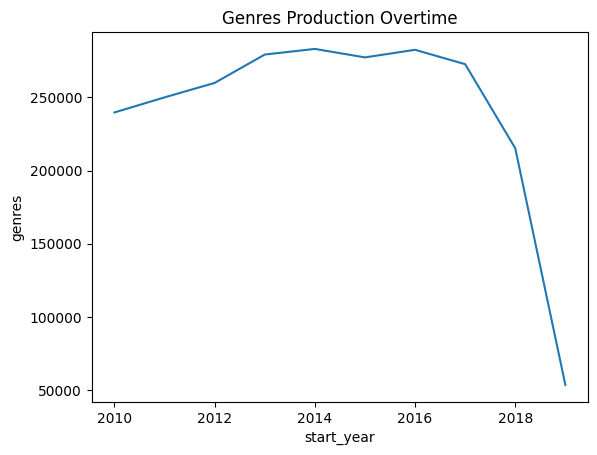

In [ ]:
# common genres produced overtime

# filter first 100 
film_copy[['genres', 'start_year']].head(200)

# Group by start_year and count how many movies each year
genre_over_time = film_copy.groupby('start_year').count().reset_index()

# plot 
fig, ax =plt.subplots()
sns.lineplot(data=genre_over_time, x='start_year', y='genres')
ax.set_title('Genres Production Overtime')
plt.show